In [1]:
import pandas as pd
import numpy as np 
#### 
from sklearn.model_selection import train_test_split , StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
#df = pd.read_csv('./2K_1420_part_1234567features.csv',delimiter=';',index_col=False) 




df = pd.read_csv('/Users/pooyan/Documents/Emerson/data/data.csv', index_col=False, sep=";", header=0)
#set 0 as normal as 1 as abnormal
df.insert(3, 'target', 0)

# df.drop('Rows Header(1)')
df



indexes = []
df['target']= 0

indexes = df[df['RU.LNG.214LRSA450.PV'] <= 47].index | \
df[df['RU.LNG.214LRSA450.PV'] <= 45].index | \
df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218C.PV'] < df['RU.LNG.214PRA218C.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TRA476A.PV'] < df['RU.LNG.214TRA476A.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PZA451A.PV'] < df['RU.LNG.214PZA451A.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PDRA425.PV'] < df['RU.LNG.214PDRA425.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA431.PV'] > df['RU.LNG.214PRA431.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA434.PV'] > df['RU.LNG.214PRA434.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218.PV'] < df['RU.LNG.214PRA218.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PDRA436.PV'] < df['RU.LNG.214PDRA436.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214SZA458.PV'] < df['RU.LNG.214SZA458.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA221A.PV'] < df['RU.LNG.214PRA221A.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA221B.PV'] < df['RU.LNG.214PRA221B.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TR210.PV'] > df['RU.LNG.214TR210.PV'].quantile(0.99)].index |\
df[df['RU.LNG.214PRA218A.PV'] < df['RU.LNG.214PRA218A.PV'].quantile(0.01)].index 

<ipython-input-1-65e0578e5dfc>:31: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indexes = df[df['RU.LNG.214LRSA450.PV'] <= 47].index | \
<ipython-input-1-65e0578e5dfc>:31: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indexes = df[df['RU.LNG.214LRSA450.PV'] <= 47].index | \
<ipython-input-1-65e0578e5dfc>:31: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indexes = df[df['RU.LNG.214LRSA450.PV'] <= 47].index | \
<ipython-input-1-65e0578e5dfc>:31: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.unio

In [2]:
#df[df['RU.LNG.214TRA476A.PV'] > df['RU.LNG.214TRA476A.PV'].quantile(0.99)].index   |\

df.loc[indexes, 'target'] = 1
print("Abnormal samples: ",len(df[df['target']==1]), "Normal samples: ",len(df[df['target']==0]) )

Abnormal samples:  3388 Normal samples:  67173


In [3]:
X = df.loc[:,'RU.LNG.214PZA451A.PV':].to_numpy() # all measurement columns
y = df['target'].to_numpy() # labels 

In [5]:
...
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
#t = MinMaxScaler()
#t.fit(X_train)
#X_train = t.transform(X_train)
#X_test = t.transform(X_test)

In [8]:
n_inputs = X.shape[1]
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

In [9]:
...
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [10]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [11]:
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [12]:
...
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Epoch 1/200
2955/2955 - 4s - loss: 575751.6875 - val_loss: 436177.8125
Epoch 2/200
2955/2955 - 3s - loss: 262134.8125 - val_loss: 102534.1016
Epoch 3/200
2955/2955 - 3s - loss: 44664.9258 - val_loss: 15629.8369
Epoch 4/200
2955/2955 - 3s - loss: 1929.4136 - val_loss: 2717.1338
Epoch 5/200
2955/2955 - 3s - loss: 877.2440 - val_loss: 4122.0327
Epoch 6/200
2955/2955 - 3s - loss: 576.2485 - val_loss: 5641.9487
Epoch 7/200
2955/2955 - 3s - loss: 485.5572 - val_loss: 8111.6323
Epoch 8/200
2955/2955 - 3s - loss: 326.5538 - val_loss: 10769.5527
Epoch 9/200
2955/2955 - 3s - loss: 292.2531 - val_loss: 6437.8296
Epoch 10/200
2955/2955 - 3s - loss: 246.7171 - val_loss: 11097.3584
Epoch 11/200
2955/2955 - 3s - loss: 248.7850 - val_loss: 4076.8076
Epoch 12/200
2955/2955 - 3s - loss: 218.0248 - val_loss: 4009.3101
Epoch 13/200
2955/2955 - 3s - loss: 218.2157 - val_loss: 29055.3770
Epoch 14/200
2955/2955 - 3s - loss: 147.7069 - val_loss: 1706.1877
Epoch 15/200
2955/2955 - 3s - loss: 177.9892 - val_los

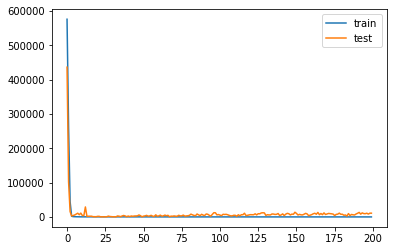

In [13]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [14]:
...
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
